# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Stats 101
Week 2 | Lesson 1.3 ..

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Define alpha level, aka level of significance
- Define what null hypothesis means
- Define what a p-value means
- Define confidence intervals ..


### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- [hypothesis testing and p values](https://www.khanacademy.org/math/probability/statistics-inferential/hypothesis-testing/v/hypothesis-testing-and-p-values) ..

### LESSON GUIDE
| TIMING  | TYPE  |
|:-:|---|
| 20 min  | [Introduction](#introduction)   |
| 20 min  | Hypothesis Testing  | 
| 20 min  | T-Test  | 
| 10 min  | Confidence Interval | 
| 15 min  | Bootstrap Statistics | 
| 5 min  | [Conclusion](#conclusion)  |  


## "Bayesian" vs. "Frequentist"

There are two big "camps" in statistics: **Frequentist** and **Bayesian**. 

Not too be taken seriously, but have some fun links:

- [Frequentist vs Bayesian - XKCD](https://xkcd.com/1132/)

- [Bayesian Drinking Game - SMBC](http://www.smbc-comics.com/?id=3366)

- [Bayesianism - SMBC](http://www.smbc-comics.com/index.php?id=4127)


I will get to the essential differences, but it is important to remember the overarching goal of both:
    
---

**As statisticians we want to make a statement about ALL data points based on a SAMPLE of data points, and describe our UNCERTAINTY about that statement.**

---


### Estimating a mean value

Say we want to measure the **mean height of 25 year old San Francisco males**. We measure the height of 100 different 25 year old males and thus have 100 data points in our sample.

Our scenario:

- We want to make a statement about the mean height of **ALL** 25 year old San Francisco males.
- We have a **sample** of 100 measured heights from that **population**.

### Estimating the mean height from a Bayesian approach...

As a **Bayesian** I believe:

- The mean height of 25 year old San Francisco males is indeed a value, but it is drawn from a **prior probability distribution** of 25 year old San Francisco male heights.
- I have collected **fixed data** which I use to update my inference of the probability for the mean height, which is called my **posterior distribution** of mean heights.

### Estimating the mean height from a Frequentist approach...

As a **Frequentist** I believe:

- The mean height of 25 year old San Francisco males is an unknown but **fixed, "true" value**.

- My 100 data points are considered to be a **random sample.** That is to say, I have collected **at random** 100 heights from the **population pool**.

- This random sampling procedure is considered **infinitely repeatable**. My inferences about height are based on the idea that this sample is just one of an infinite number of potential population samples.

- Though the **data sampled is random**, the **true value of height is fixed** across samples.

### Pros and cons to both

Recent hype may have lead you to believe that Bayesian methods are definitively better than Frequetist, but the real truth is that there are pros and cons to both.

---

**Bayesian methods**:

- Pros: Inference on measure is more intuitive. No "absurd" results. Does not require "infinite sampling" theory.
- Cons: Computationally intensive. Does not "guarantee" success rate of experiments. Requires prior belief.

** Frequentist methods:**

- Pros: Requires no justification of prior belief. Direct analogy to experimental design theory. Not as computationally expensive.
- Cons: Inference not as intuitive. Requires "asymptotic" sampling axioms. Allows "absurd" results (it is ok if some of the "experiments" are nonsense as long as most are correct.)

## Hypothesis testing with frequentist methods

**Frequentist** methods lend themselves well to the idea of experimental design. For example, say we are giving people a pill that makes them faster to solve math problems.

- One hundred (100) people math students are randomly selected from a broader population.
- Randomly assign 
    - 50 to the (placebo) control group, and 
    - 50 to the treatment group. 

- The study is double blind, so neither experimenters, nor subjects know which group they are assigned to.


### The "null hypothesis"

The **null hypothesis** is a fundamental concept for Frequentist statistics. We can define this as **$H_0$**. The null hypothesis is, in this example, the hypothesis that there is no difference between placebo and treatment.

**$H_0$:** The measured parameter is equal to a specific value for the population.

The **alternative hypothesis** is the other possible outcome of the experiment: the difference between the placebo and the treatment is real/not zero.

**$H_{1}$**:  The measured parameter is different for the population than the value in the null hypothesis.

$H_{1}$ is also referred to by $H_{A}$

### The p-value

The **p-value** is the probability that, **GIVEN THE NULL HYPOTHESIS IS TRUE**, we would have the current set of data. 

---

Say in our experiment we follow-up with the experimental and control groups:

- control group results
    - pre-study: mean test speed was 120 seconds, with a standard deviation of 15 seconds
    - post-study: mean test speed was $\bar{x}_1$ seconds, with a standard deviation of 15 seconds 
- treatment group results
    - pre-study: mean test speed was 120 seconds, with a standard deviation of 15 seconds
    - post-study: mean test speed was $\bar{x}_2$ seconds, with a standard deviation of 15 seconds 
    

The **p-value** would be the **probability that there is no difference between $\bar{x}_1$ and $\bar{x}_2$ an equal standard deviation of 15 over a sample an equally divided sample of 100 people.**

#### What is the difference in value that would fall outside a 95% confidence interval?

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
sns.set(rc={"figure.figsize": (9, 7)})

In [2]:
n_sample_placebo = 50.
n_sample_drug = 50.
stdev_placebo = 15
stdev_drug = 15

standard_error = (stdev_drug**2) / n_sample_drug + (stdev_placebo**2) / n_sample_placebo
standard_deviation_of_sample_diff = math.sqrt(standard_error)

print standard_deviation_of_sample_diff

3.0


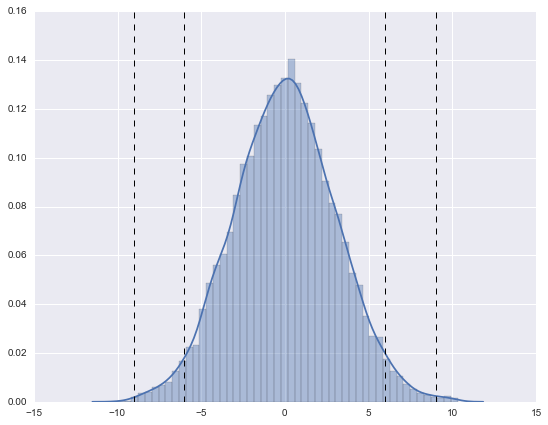

In [3]:
diff_dist = np.random.normal(0.0, standard_deviation_of_sample_diff, 10000)
ax = sns.distplot(diff_dist)
ax.axvline(standard_deviation_of_sample_diff*2, color='k', linestyle='--', lw=1)
ax.axvline(standard_deviation_of_sample_diff*-2, color='k', linestyle='--', lw=1)
ax.axvline(standard_deviation_of_sample_diff*3, color='k', linestyle='--', lw=1)
ax.axvline(standard_deviation_of_sample_diff*-3, color='k', linestyle='--', lw=1)


In [4]:
n_sample_placebo = 50.
n_sample_drug = 50.
mean_placebo = 100.
mean_drug = 95.
stdev_placebo = 15
stdev_drug = 15

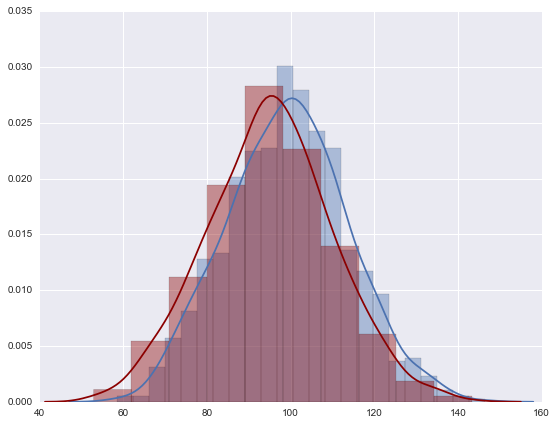

In [5]:
placebo_dist = np.random.normal(mean_placebo, stdev_placebo, 1000)
drug_dist = np.random.normal(mean_drug, stdev_drug, 1000)

ax = sns.distplot(placebo_dist)
sns.distplot(drug_dist, color='darkred', bins=10, ax=ax)

In [6]:
n_sample_placebo = 50.
n_sample_drug = 50.
mean_placebo = 100.
mean_drug = 85.
stdev_placebo = 15
stdev_drug = 15

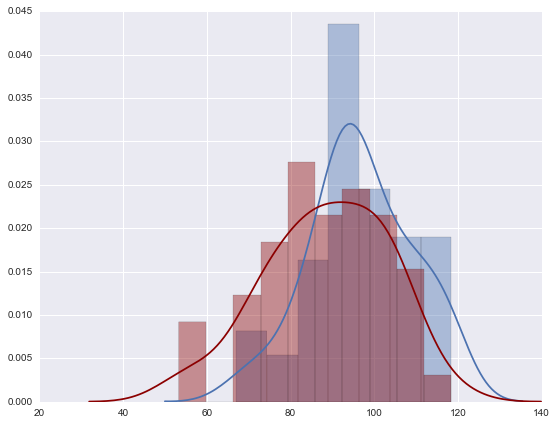

In [7]:
placebo_dist = np.random.normal(mean_placebo, stdev_placebo, 50)
drug_dist = np.random.normal(mean_drug, stdev_drug, 50)

ax = sns.distplot(placebo_dist)
sns.distplot(drug_dist, color='darkred', bins=10, ax=ax)

### t-tests: calculating the p-value

How do we calculate the **p-value**? For comparing two means (as is the case in this example: the mean difference in symptoms between conditions) we can use a **t-test**.

There are a few different t-test:
- unpaired t-test
- paired t-test
- one sample


#### Unpaired t-test

$$ \text{t-value}=\frac{(\bar{x}_1 - \bar{x}_2) - d_0}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} $$

##### t\-value tells us if the difference between two sample is larger than the difference in between samples

The t-statistic measures the **signal to noise ratio** in our data.

- **The signal is our measured difference.** This is our measured mean minus the hypothesized mean **H0**.

- **The noise** is the **variation in our data**. This is how much our measurements vary (measured by the standard deviation), with a penalty for smaller sample sizes (the square root of the sample size).

In [8]:
n_sample_placebo = 50.
n_sample_drug = 50.
mean_placebo = 100.
mean_drug = 95.
stdev_placebo = 15
stdev_drug = 15

num = (mean_drug - mean_placebo) - 0.0
den_sum = (stdev_drug**2)/n_sample_drug + (stdev_placebo**2)/n_sample_placebo
t = num / math.sqrt(den_sum)
t

-1.6666666666666667

#### To get the p-value, look at the table

```
t-DISTRIBUTION (t-TABLE) or t-VALUES WHEN P( > t)

                 ---             
              --- | ---          
            --    |    --        
          --      |    |:--      
     ___--        |    |:::--___ 
    --------------+----+---------
                  0    t         

   DF |     t(0.1)   t(0.05)  t(0.025)   t(0.01)  t(0.005) t(0.0025) 
 -----+--------------------------------------------------------------
    1 |     3.078     6.314    12.706    31.821    63.657   127.321
    2 |     1.886     2.920     4.303     6.965     9.925    14.089
    3 |     1.638     2.353     3.182     4.541     5.841     7.453
    4 |     1.533     2.132     2.776     3.747     4.604     5.598
    5 |     1.476     2.015     2.571     3.365     4.032     4.773
   10 |     1.372     1.812     2.228     2.764     3.169     3.581
   20 |     1.325     1.725     2.086     2.528     2.845     3.153
   30 |     1.310     1.697     2.042     2.457     2.750     3.030
   40 |     1.303     1.684     2.021     2.423     2.704     2.971
   50 |     1.299     1.676     2.009     2.403     2.678     2.937
   70 |     1.294     1.667     1.994     2.381     2.648     2.899
   90 |     1.291     1.662     1.987     2.368     2.632     2.878
  100 |     1.290     1.660     1.984     2.364     2.626     2.871
  120 |     1.289     1.658     1.980     2.358     2.617     2.860

    Z       1.282     1.645     1.960     2.326     2.576     2.807
```

From [statex](http://www.statext.com/practice/T-Distribution01.php)

In [9]:
res = stats.ttest_ind_from_stats(mean_drug, stdev_drug, n_sample_drug,
                                 mean_placebo, stdev_placebo, n_sample_placebo,
                                 equal_var=True)

print "t-value:",res.statistic
print "p-value:",res.pvalue/2.0

t-value: -1.66666666667
p-value: 0.0493868900791


## Confidence intervals

You may have heard of people describing "95% confidence intervals" in experiments measuring mean differences.

What do you think of this definition of confidence intervals:

**Def.1:** The 95% confidence interval around a mean indicates that there is a 95% chance the true mean falls in that interval.

#### Yes, but not quite

That is a **Bayesian** way of thinking (which is confusingly called "credible intervals"). The **Frequentist confidence interval** is defined as:

**Correct definition:** In 95% of experiments, an interval constructed with this threshold will contain the true mean.

### Bootstrapping the confidence interval

**Bootstrapping** is the procedure of **resampling your sample** to extract confidence intervals.

[Bootstrapping has other extended uses. We will talk about bootstrapping in depth later.]

Imagine we resample our sample 1000 times and each time calculate the mean. What can we use these values for?

---

**A:** Bootstrapped means can give us additional information about our **statistic of interest**. For example, the 2.5th percentile and 97.5th percentile can give us the 95% confidence interval for our statistic.

### Why does bootstrapping work?

This question is beyond the scope of this lecture, and potentially beyond the scope of our class (at least mathematically). 

However, there is a good intuition for the bootstrap.

---
The bootstrapping procedure is based on the same infinite sampling theory that Frequentist statistics leverages. Remember that taking a random sample of people and measuring them provides us the ability  to **infer information about the whole population.**

Likewise, **bootstrapping our statistic of interest lets us infer information _about the "population" of our measured statistic!**

### Code the confidence interval bootstrap

Coding a function to perform the bootstrap for a confidence interval is surprisingly simple!

In [10]:
def mean_ci_bootstrap(sample, confidence, iterations):
    upper_ci = 100 - (100 - confidence)/2.
    lower_ci = (100 - confidence)/2.
    print upper_ci, lower_ci
    
    subsamples = [np.random.choice(sample, size=len(sample), replace=True) for i in range(iterations)]
    means = [np.mean(subsample) for subsample in subsamples]
    
    upper_ci_value = np.mean([np.percentile(subsample, upper_ci) for subsample in subsamples])
    lower_ci_value = np.mean([np.percentile(subsamples, lower_ci) for subsample in subsamples])
    mean_of_means = np.mean(means)
    
    return([mean_of_means, upper_ci_value, lower_ci_value])
    

In [11]:
random_vals = np.random.normal(50, 22.5, size=10000)
[mean_of_means, upper_ci_value, lower_ci_value] = mean_ci_bootstrap(random_vals, 95, 100)
sample_mean = np.mean(random_vals)

print 'Mean:', sample_mean
print 'Bootstrapped mean:', mean_of_means
print 'Upper 95% CI:', upper_ci_value
print 'Lower 95% CI:', lower_ci_value

97.5 2.5
Mean: 49.8177001956
Bootstrapped mean: 49.8394249477
Upper 95% CI: 94.0272658159
Lower 95% CI: 5.86640970426


## Conclusion

*You should be able now to defined:*

- Define alpha level, aka level of significance
- Define what null hypothesis means
- Define what a p-value means
- Define confidence intervals ..


*More fun with XKCD*

- https://xkcd.com/892/
- https://xkcd.com/882/